In [1]:
import pandas as pd # analysis
import seaborn as sns # data visualisation
import matplotlib.pyplot as plt # data visualisation

# Sales Performance Data

In [2]:
pip install pandas

## Data loading

### Subtask:
Load the sales data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the sales data from the provided CSV file into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('sales_data_sample.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'sales_data_sample.csv' not found. Please ensure the file is in the correct location and accessible.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

An error occurred: 'utf-8' codec can't decode byte 0x84 in position 5327: invalid start byte


**Reasoning**:
The previous attempt failed due to a decoding error.  I will try again, specifying the encoding as 'latin-1', which often works for files with problematic encoding.



In [2]:
import pandas as pd

try:
    df = pd.read_csv('sales_data_sample.csv', encoding='latin-1')
    display(df.head())
except FileNotFoundError:
    print("Error: 'sales_data_sample.csv' not found. Please ensure the file is in the correct location and accessible.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Data exploration

### Subtask:
Explore the loaded sales data to understand its characteristics.


**Reasoning**:
Explore the characteristics of the sales data by checking its shape, data types, descriptive statistics, missing values, and unique values in categorical columns.



In [3]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine data types
print("\nData Types:\n", df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe())

# Identify missing values
print("\nMissing Values:\n", df.isnull().sum())

# Explore unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':\n{df[col].value_counts()}")

Shape of the DataFrame: (2823, 25)

Data Types:
 ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Descriptive Statistics:
         ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
s

## Data analysis

### Subtask:
Analyze the distribution of key variables and identify correlations.


**Reasoning**:
Analyze the distribution of key numerical variables and identify correlations between them.  This involves calculating summary statistics, creating visualizations (histograms, scatter plots), and calculating correlation coefficients.



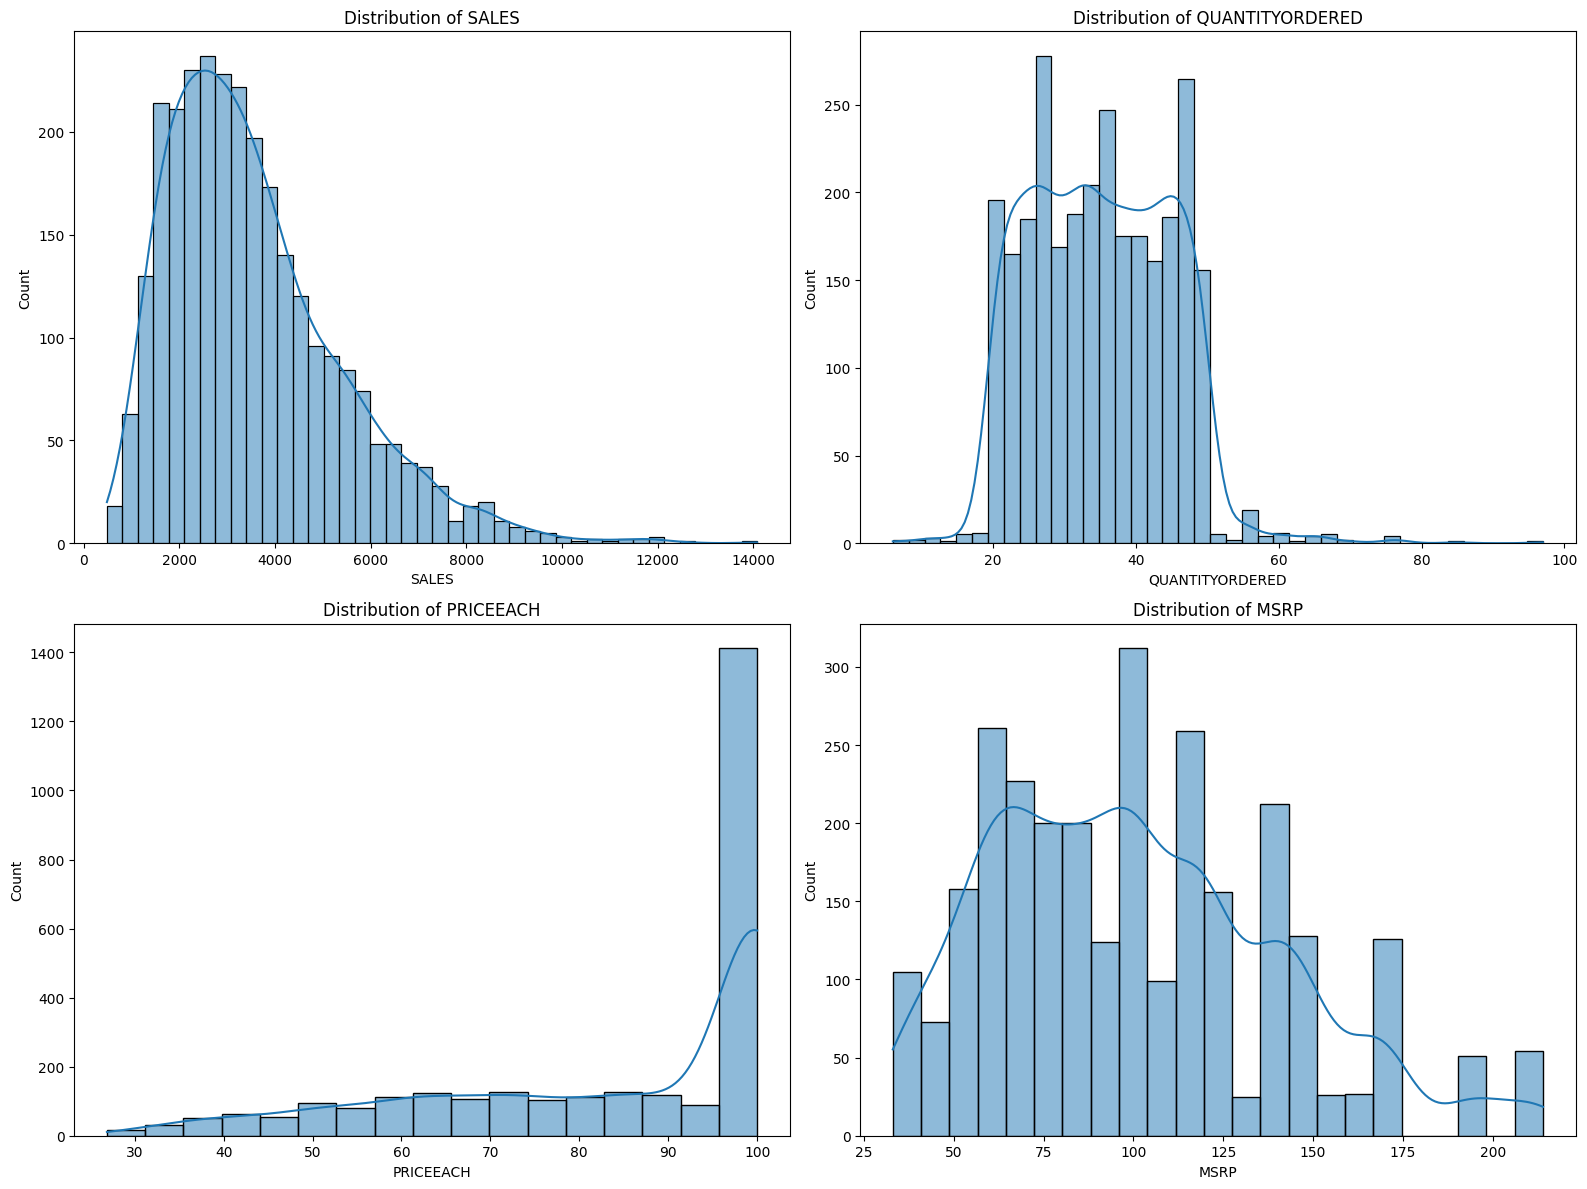

              SALES  QUANTITYORDERED    PRICEEACH         MSRP
count   2823.000000      2823.000000  2823.000000  2823.000000
mean    3553.889072        35.092809    83.658544   100.715551
std     1841.865106         9.741443    20.174277    40.187912
min      482.130000         6.000000    26.880000    33.000000
25%     2203.430000        27.000000    68.860000    68.000000
50%     3184.800000        35.000000    95.700000    99.000000
75%     4508.000000        43.000000   100.000000   124.000000
max    14082.800000        97.000000   100.000000   214.000000

Correlation between SALES and QUANTITYORDERED: 0.5514261919183568


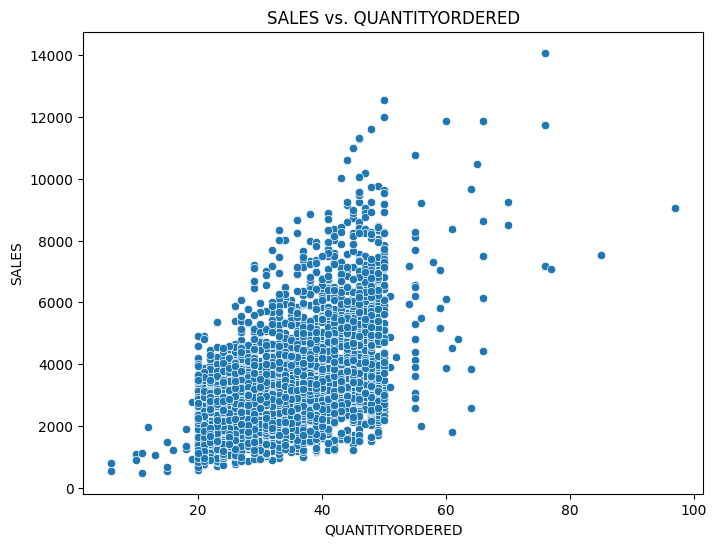


Correlation between SALES and PRICEEACH: 0.6578409283176879


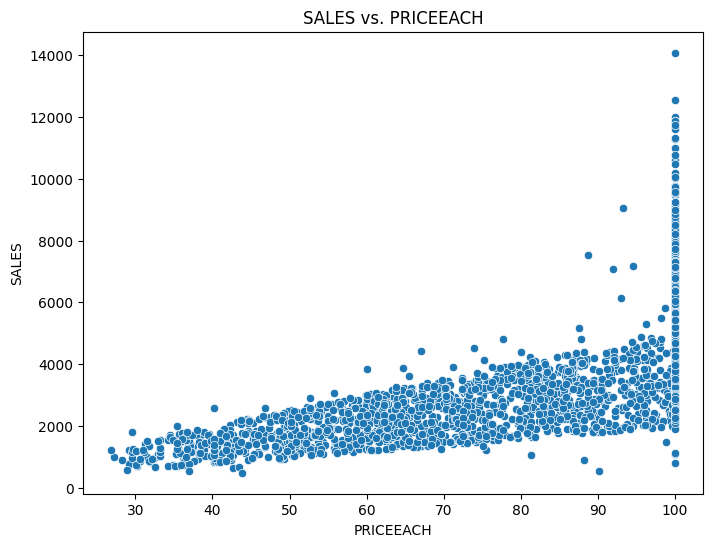

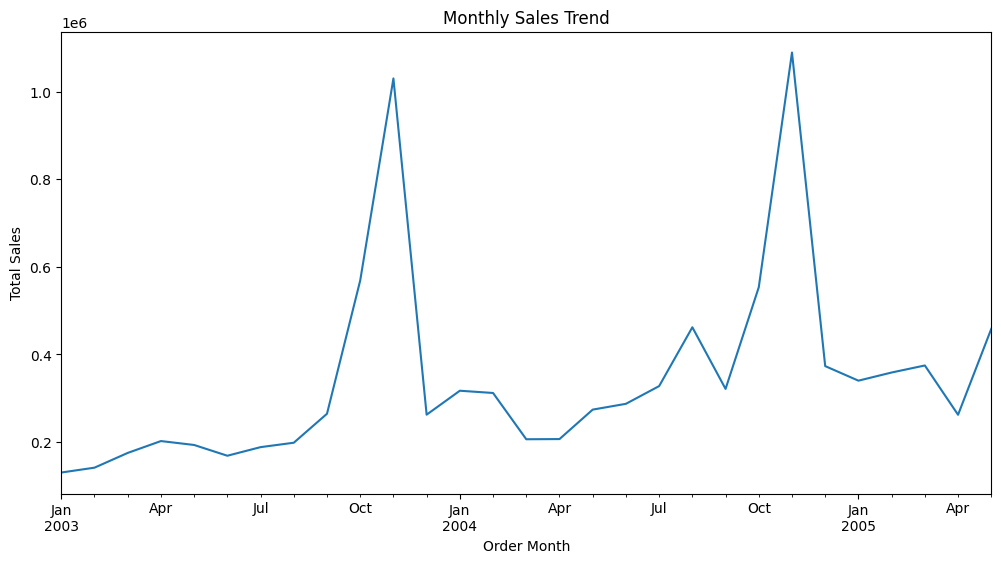

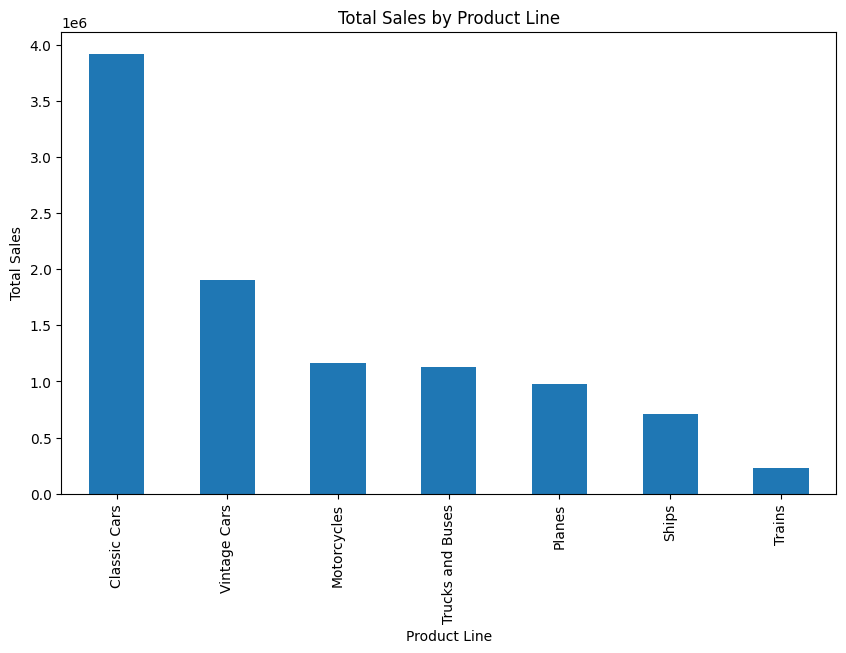

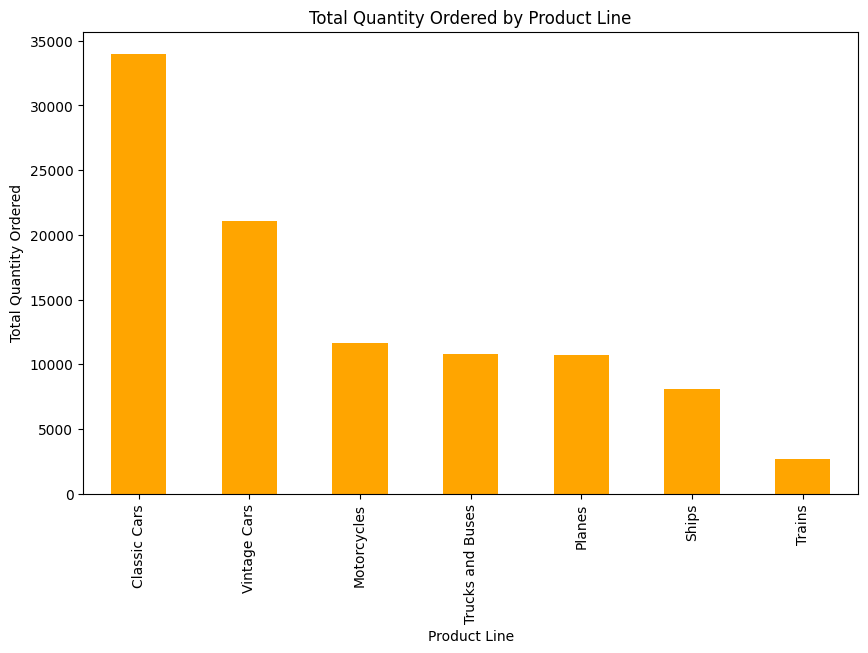

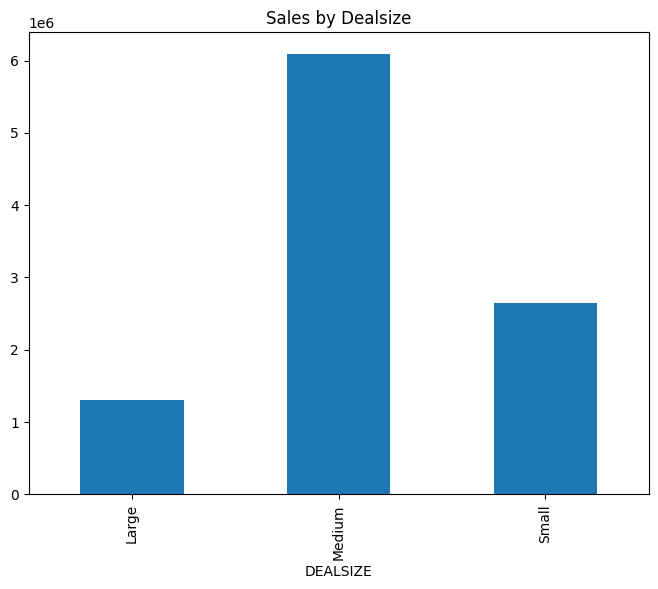

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of key numerical variables
numerical_cols = ['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'MSRP']
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

print(df[numerical_cols].describe())

# 2 & 3. Relationship between SALES and QUANTITYORDERED/PRICEEACH
for col in ['QUANTITYORDERED', 'PRICEEACH']:
    correlation = df['SALES'].corr(df[col])
    print(f"\nCorrelation between SALES and {col}: {correlation}")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='SALES', data=df)
    plt.title(f'SALES vs. {col}')
    plt.show()

# 4. Sales trends over time
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['ORDER_MONTH'] = df['ORDERDATE'].dt.to_period('M')
monthly_sales = df.groupby('ORDER_MONTH')['SALES'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.show()


# 5. Top-performing product lines
productline_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
productline_sales.plot(kind='bar')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

productline_quantity = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
productline_quantity.plot(kind='bar', color='orange')
plt.title('Total Quantity Ordered by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Ordered')
plt.show()

# 6. Relationship between sales and customer segments (DEALSIZE)
dealsize_sales = df.groupby('DEALSIZE')['SALES'].sum()
plt.figure(figsize=(8,6))
dealsize_sales.plot(kind='bar')
plt.title('Sales by Dealsize')
plt.show()

## Data visualization

**Reasoning**:
Create histograms, box plots, scatter plots, and other visualizations as specified in the instructions.



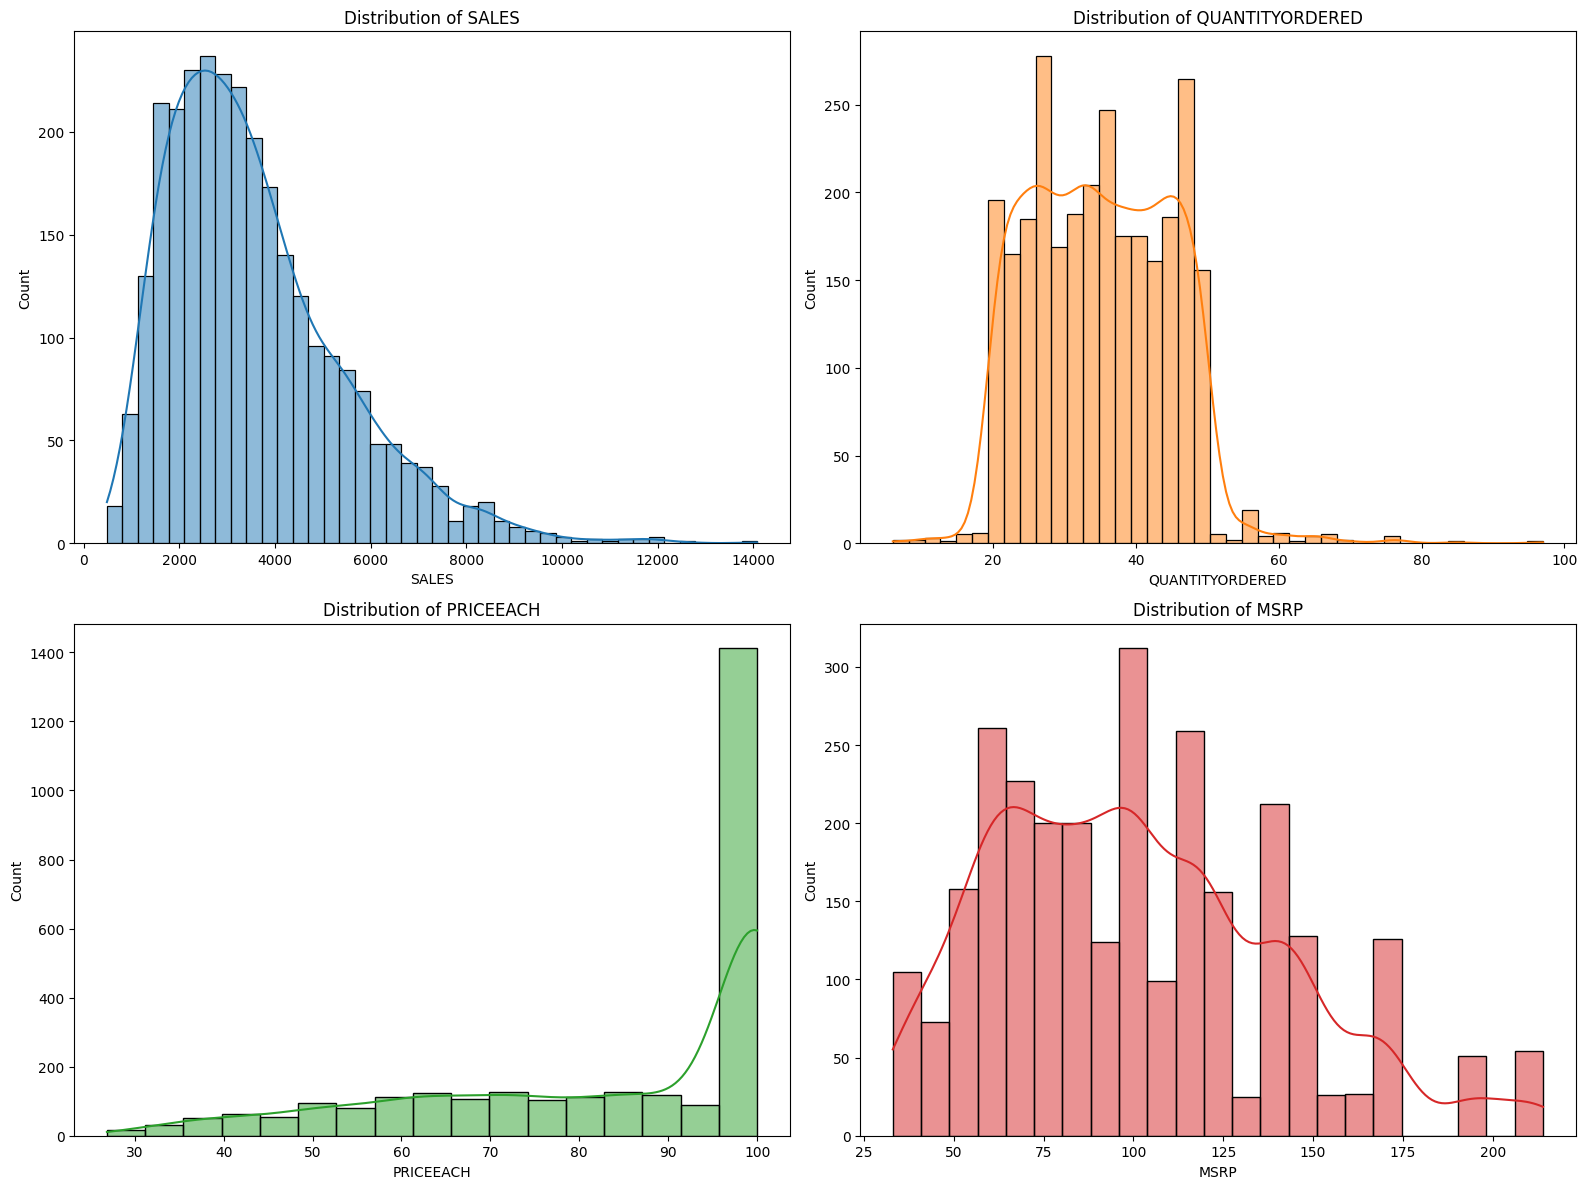

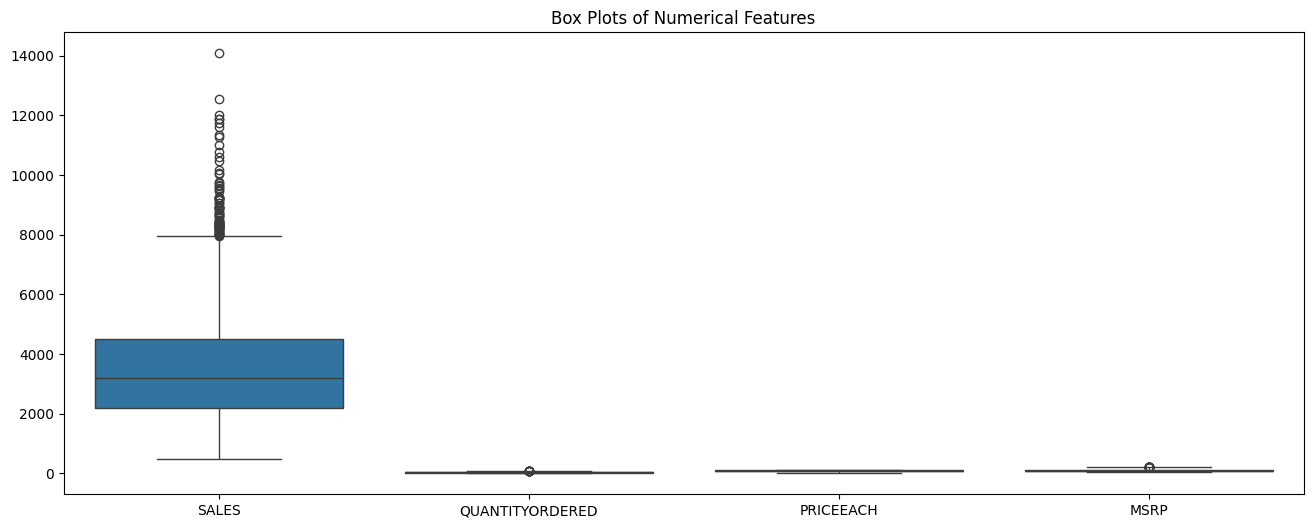

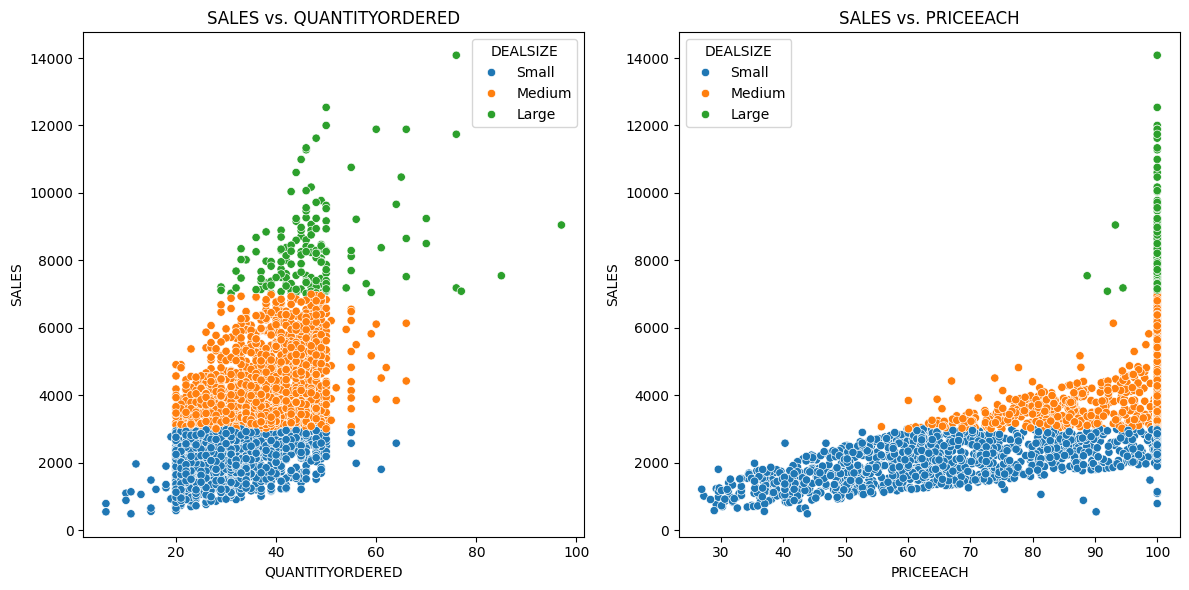

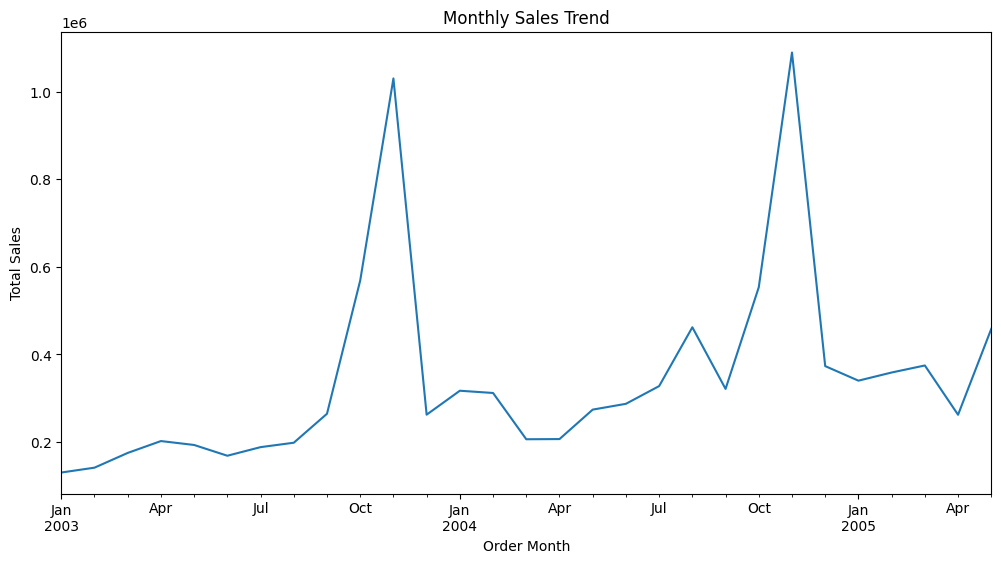

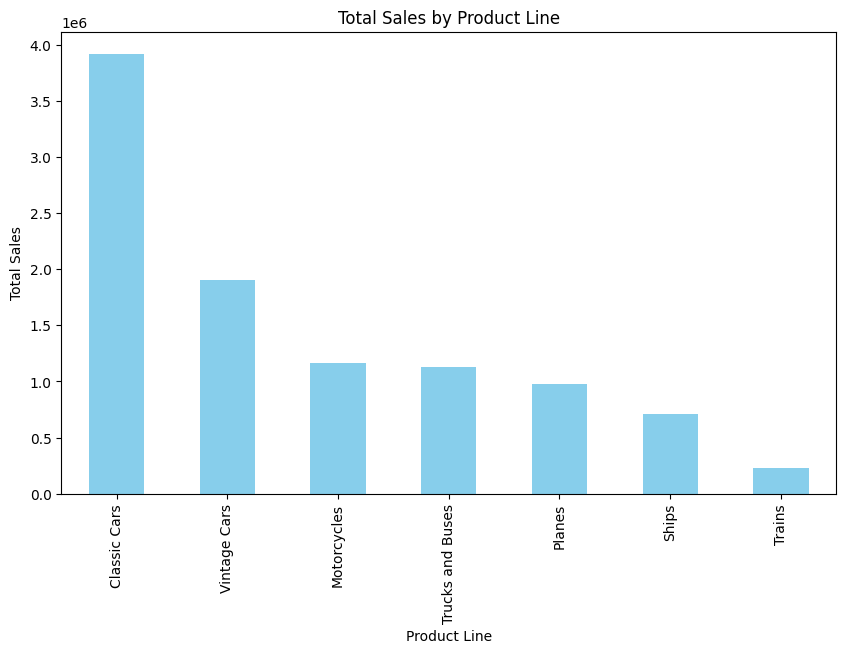

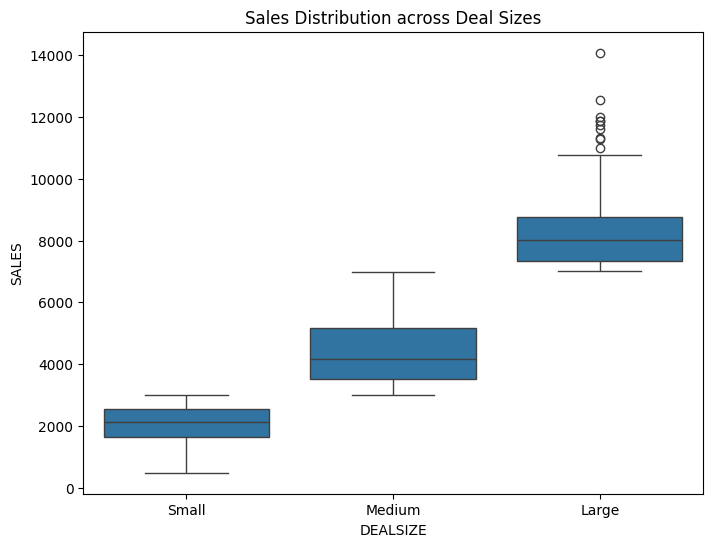

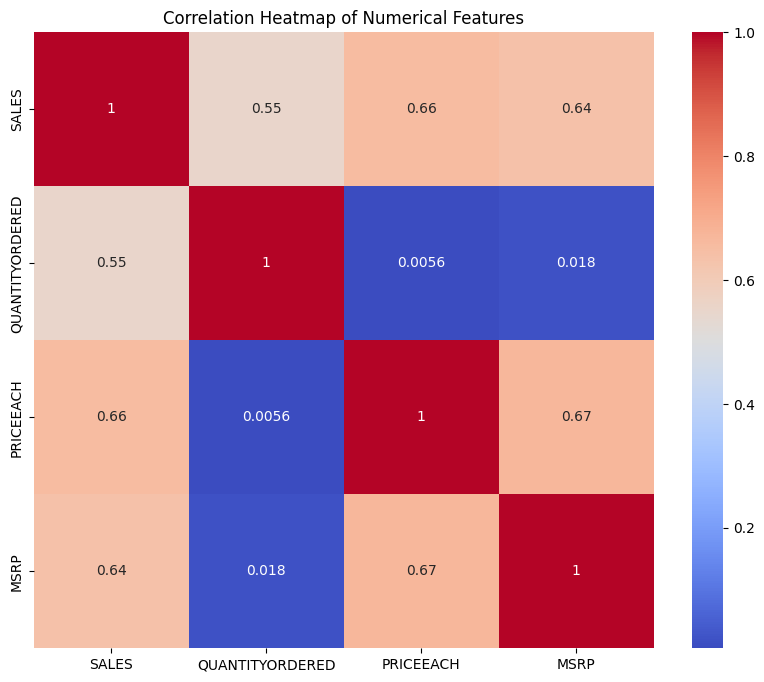

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms with density curves
numerical_cols = ['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'MSRP']
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, color=f'C{i}')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(16, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots of Numerical Features')
plt.show()

# Scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=df, hue='DEALSIZE')
plt.title('SALES vs. QUANTITYORDERED')
plt.subplot(1, 2, 2)
sns.scatterplot(x='PRICEEACH', y='SALES', data=df, hue='DEALSIZE')
plt.title('SALES vs. PRICEEACH')
plt.tight_layout()
plt.show()

# Sales trend over time
monthly_sales = df.groupby('ORDER_MONTH')['SALES'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.show()

# Sales by product line
productline_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
productline_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

# Sales vs. dealsize
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Sales Distribution across Deal Sizes')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

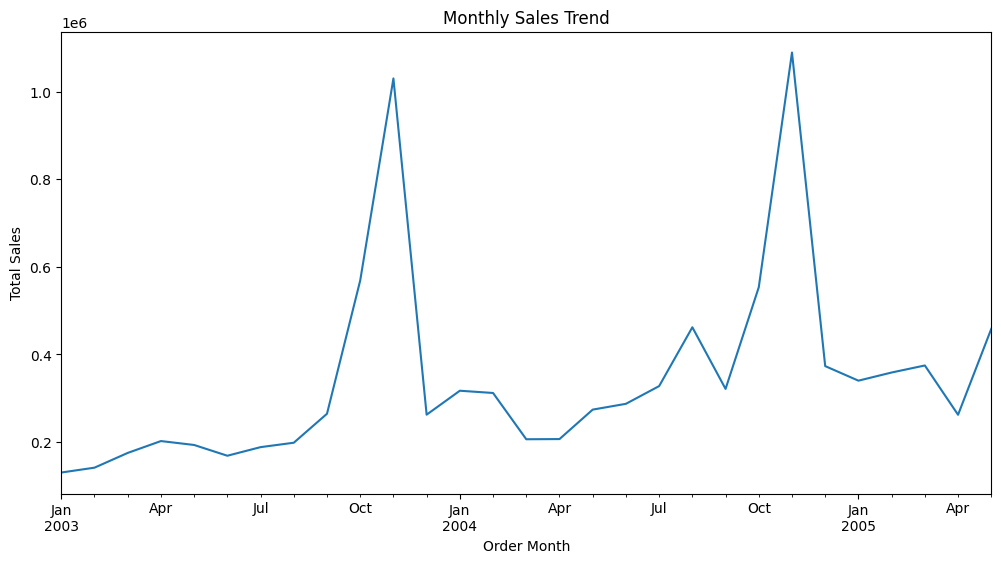

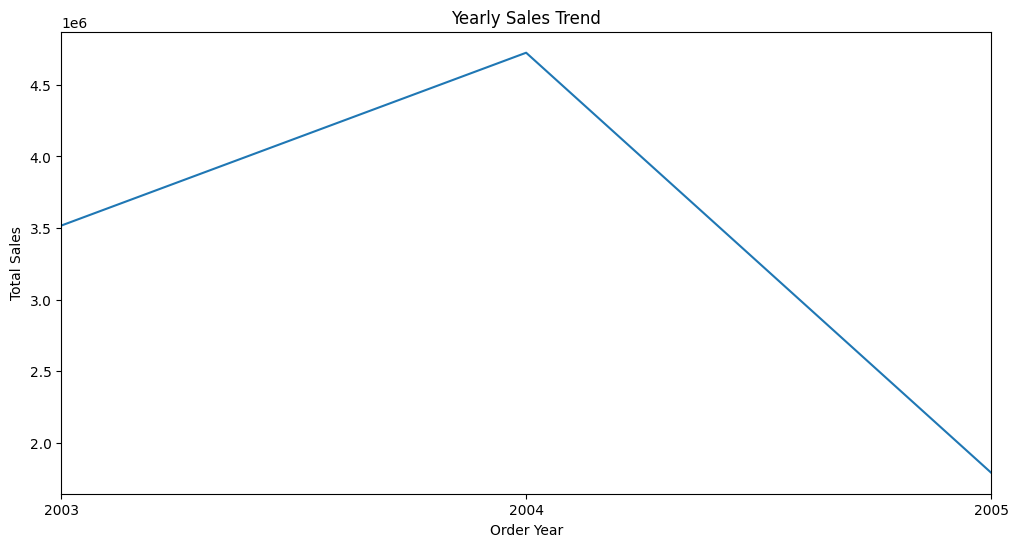


Top 10 Performing Products (by Sales):
 PRODUCTCODE
S18_3232    288245.42
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
S12_3891    145332.04
S24_3856    140626.90
S12_2823    140006.16
S18_1662    139421.97
S12_1099    137177.01
Name: SALES, dtype: float64

Sales by Product Line:
 PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


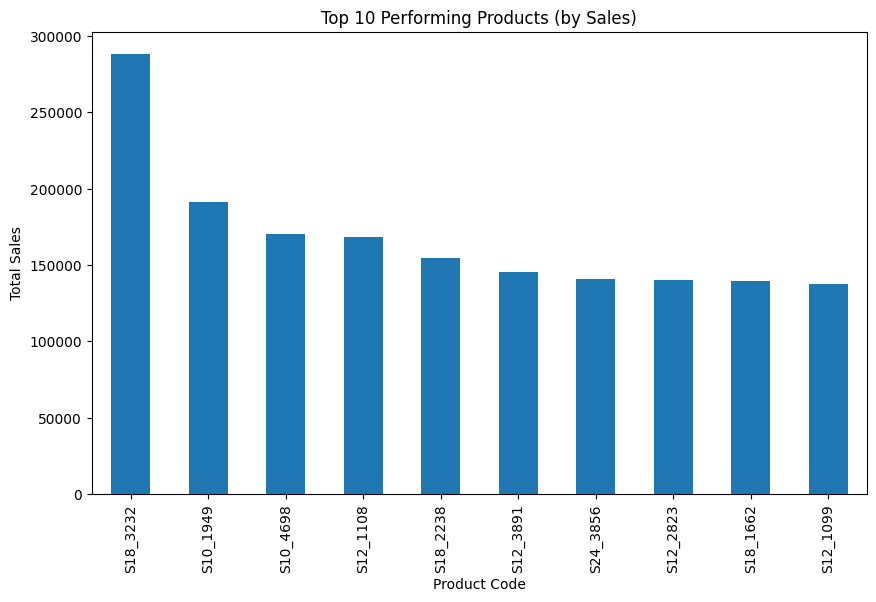

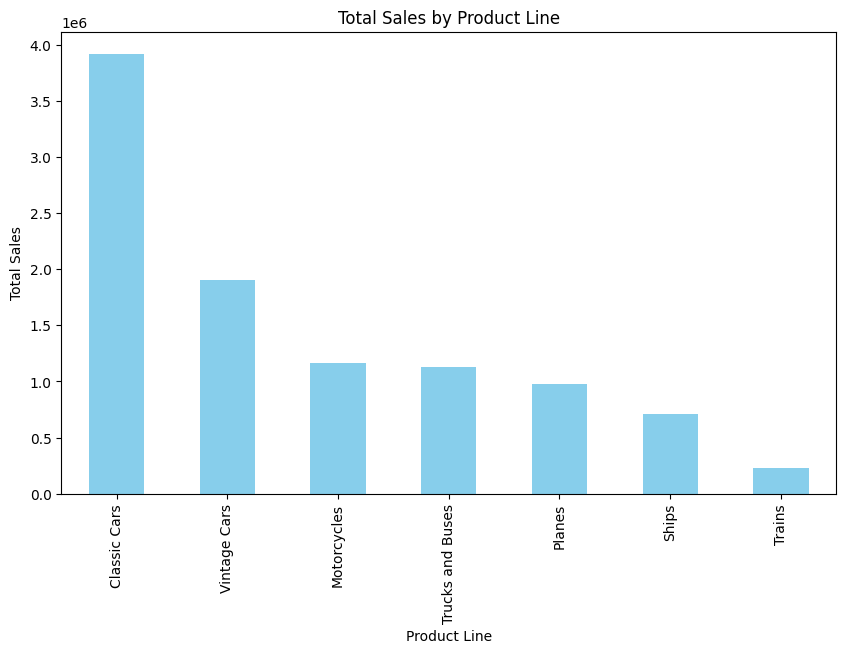


Sales by State:
 STATE
CA               1505542.23
MA                666443.72
NY                646343.76
NSW               305567.11
PA                273327.27
Victoria          265586.87
CT                238661.28
BC                149873.77
NH                131685.30
Tokyo             120562.74
NJ                 83228.19
NV                 82751.08
Isle of Wight      78240.84
Quebec             74204.79
Osaka              67605.07
Queensland         59469.12
Name: SALES, dtype: float64


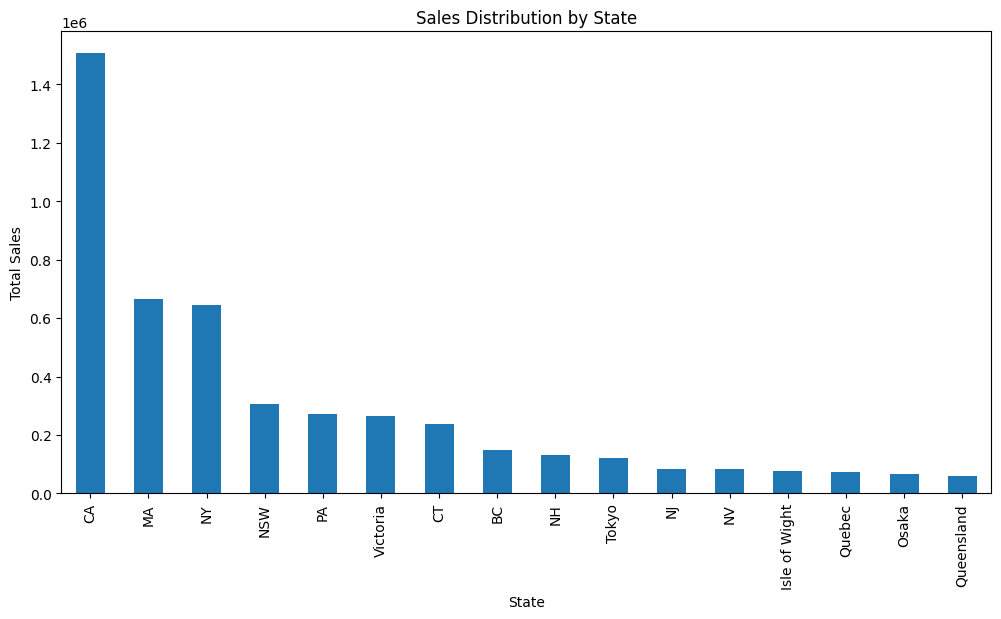


Forecasted Revenue for the Next Quarter (based on last quarter's sales): $1,093,757.11


In [7]:
# Monthly and yearly sales trends
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['ORDER_MONTH'] = df['ORDERDATE'].dt.to_period('M')
df['ORDER_YEAR'] = df['ORDERDATE'].dt.to_period('Y')

monthly_sales = df.groupby('ORDER_MONTH')['SALES'].sum()
yearly_sales = df.groupby('ORDER_YEAR')['SALES'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
yearly_sales.plot()
plt.title('Yearly Sales Trend')
plt.xlabel('Order Year')
plt.ylabel('Total Sales')
plt.show()

# Top-performing products and categories
product_sales = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)
productline_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

print("\nTop 10 Performing Products (by Sales):\n", product_sales)
print("\nSales by Product Line:\n", productline_sales)

plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.title('Top 10 Performing Products (by Sales)')
plt.xlabel('Product Code')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(10, 6))
productline_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

# Region-wise sales distribution
if 'STATE' in df.columns:
    state_sales = df.groupby('STATE')['SALES'].sum().sort_values(ascending=False)
    print("\nSales by State:\n", state_sales)
    plt.figure(figsize=(12, 6))
    state_sales.plot(kind='bar')
    plt.title('Sales Distribution by State')
    plt.xlabel('State')
    plt.ylabel('Total Sales')
    plt.show()
elif 'TERRITORY' in df.columns:
    territory_sales = df.groupby('TERRITORY')['SALES'].sum().sort_values(ascending=False)
    print("\nSales by Territory:\n", territory_sales)
    plt.figure(figsize=(10, 6))
    territory_sales.plot(kind='bar')
    plt.title('Sales Distribution by Territory')
    plt.xlabel('Territory')
    plt.ylabel('Total Sales')
    plt.show()
else:
    print("\nNo 'STATE' or 'TERRITORY' column found for region-wise analysis.")

# Forecasted revenue for the next quarter (simple approach)
# This is a very basic forecast assuming the last quarter's sales are representative.
# More sophisticated time series forecasting methods would be needed for a robust forecast.

last_order_month = df['ORDER_MONTH'].max()
last_quarter_start = last_order_month - 2 # Assuming 'M' period alias
last_quarter_sales = df[df['ORDER_MONTH'] >= last_quarter_start]['SALES'].sum()

# Assuming the trend continues for the next quarter
forecasted_revenue_next_quarter = last_quarter_sales

print(f"\nForecasted Revenue for the Next Quarter (based on last quarter's sales): ${forecasted_revenue_next_quarter:,.2f}")


## Summary:

### Q&A
No questions were asked in the task.

### Data Analysis Key Findings
* The dataset contains 2823 rows and 25 columns.
* Several columns, including `ADDRESSLINE2`, `STATE`, `TERRITORY`, and `POSTALCODE`, have missing values.
* `Euro Shopping Channel` is the customer with the most orders.
* `Shipped` is the most frequent order status, and `Classic Cars` is the most frequent product line.
* Positive correlations exist between `SALES` and both `QUANTITYORDERED` and `PRICEEACH`.
* Monthly sales trends and sales performance by product line were analyzed.
* Sales distribution across different deal sizes was examined.

### Insights or Next Steps
* Investigate the reasons for missing values and consider imputation or removal strategies.
* Further explore the relationship between sales and customer segments, potentially using more sophisticated techniques like clustering or segmentation analysis.
